# Dataset Processing

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Energy

In [45]:
energy = pd.read_csv("data/raw/energy.csv")

orientations = {2: 'north', 3: 'east', 4: 'south', 5: 'west'}
energy["orientation"] = energy["orientation"].apply(lambda x: orientations[x])

glazings = {0: 'unknown', 1: 'uniform', 2: 'north', 3:'east', 4:'south', 5:'west'}
energy["glazing_area_distribution"] = energy["glazing_area_distribution"].apply(lambda x: glazings[x])


energy_cont = energy[["rel_compact", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]]
energy_cat = pd.get_dummies(energy[["orientation", "glazing_area_distribution"]], dtype=int)
energy_resp = energy[["heating_load", "cooling_load"]]
energy_processed = pd.concat([energy_cont, energy_cat, energy_resp], axis=1)
energy_processed.to_csv("data/energy.csv", index=False)

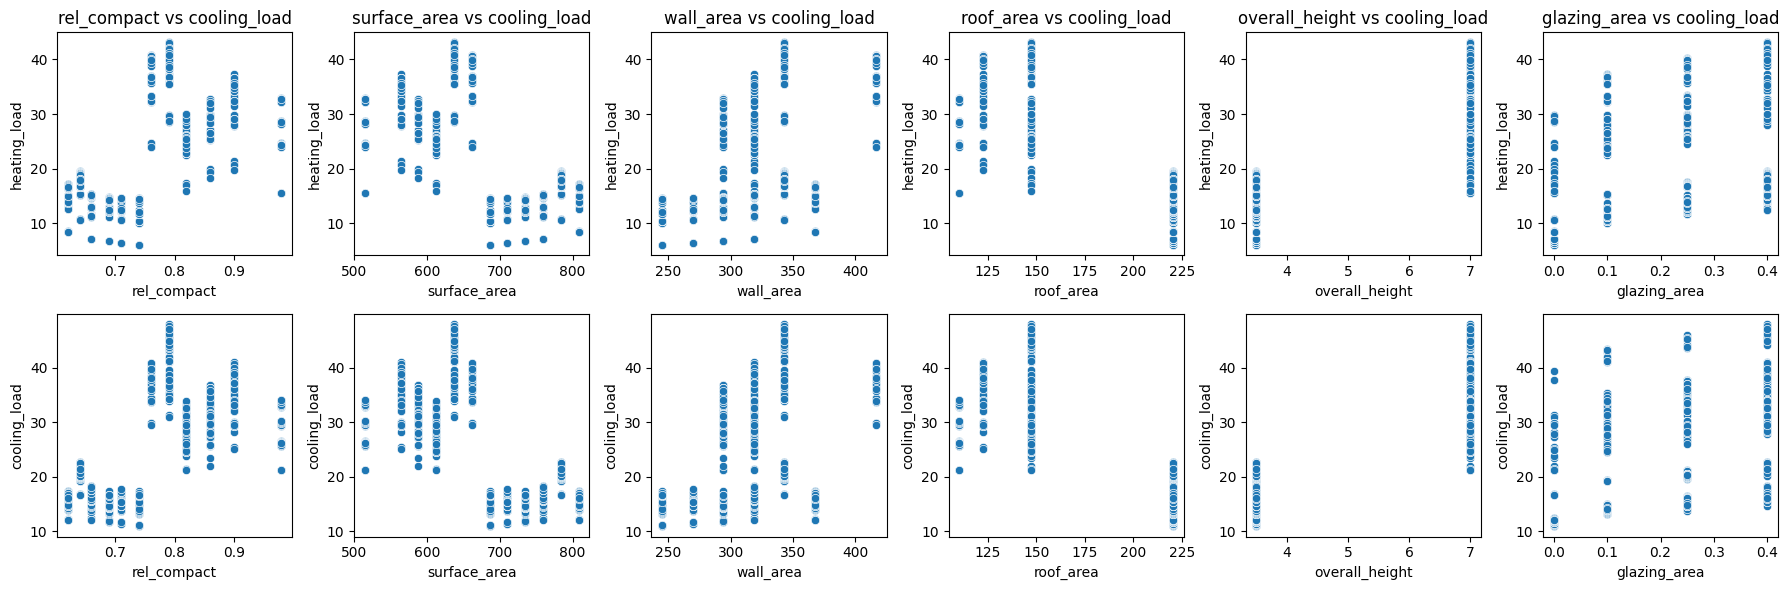

In [53]:
input_columns = ["rel_compact", "surface_area", "wall_area", "roof_area", "overall_height", "glazing_area"]  # Replace with your input columns

n_rows = 2
n_cols = len(input_columns)

# Create a figure and a set of subplots
fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3))

for i, input_col in enumerate(input_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=energy[input_col], y=energy["heating_load"], ax=ax[0, i-1])
    plt.title(f'{input_col} vs heating_load')

for i, input_col in enumerate(input_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(x=energy[input_col], y=energy["cooling_load"], ax=ax[1, i-1])
    plt.title(f'{input_col} vs cooling_load')


plt.tight_layout()
plt.show()


## Air Quality